In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## OVERALL RESULTS

In [2]:
df_cl = pd.read_csv("df_cl_metrics_hyperparams.csv")

In [3]:
df_cl.columns

Index(['model', 'cl_technique', 'experiment_name', 'time', 'best_epochs',
       'current_num_samples_training', 'learning_rate', 'hyperparams', 'last',
       'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric'],
      dtype='object')

In [4]:
df_cl["hyperparams"].fillna("None", inplace=True)

C:\Users\alber\AppData\Local\Temp\ipykernel_13744\2907957601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cl["hyperparams"].fillna("None", inplace=True)


In [5]:
# df_cl[df_cl["cl_technique"] == "vanilla_ft"]["hyperparams"] = "vanilla_ft"

In [6]:
# df_cl[df_cl["cl_technique"] == "vanilla_ft"]["hyperparams"]

In [7]:
conditions = (df_cl["model"] == "FacebookAI/roberta-base") & ((df_cl["cl_technique"] == "agem") |(df_cl["cl_technique"]=="vanilla_ft"))

In [8]:
from continual_hate.utils import clean_up_df

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
clean_up_df(df_cl[(df_cl["metric"] == "f1_score") & conditions].pivot_table( columns=["experiment_name"],values=["last"], index=["model", "cl_technique", "hyperparams"],).round(2)).to_latex("agem_hparams.tex")

In [10]:
df_cl.pivot_table(columns=["experiment_name", "metric"],values=["last"], index=["model", "cl_technique", "hyperparams"],).round(2)

last  \
experiment_name                                                           davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism   
metric                                                                                                                                                        HATE_f1_score   
model                   cl_technique hyperparams                                                                                                                              
FacebookAI/roberta-base agem         mem_size_proportion=0.01                                                           0.63                                                  
                                     mem_size_proportion=0.025                                                          0.65                                                  
                                     mem_size_proportion=0.05                                                            NaN                                                  
                        vanilla_ft   None                                                                               0.38                                                  
GroNLP/hateBERT         mas          mas_lambda=1000_mas_variation=global                                               0.49                                                  
                                     mas_lambda=1500_mas_variation=global                                               0.45                                                  
                                     mas_lambda=500_mas_variation=global                                                0.46                                                  
                        vanilla_ft   None                                                                               0.43                                                  
diptanu/fBERT           agem         mem_size_proportion=0.01                                                            NaN                                                  
                                     mem_size_proportion=0.025                                                           NaN                                                  
                                     mem_size_proportion=0.05                                                            NaN                                                  
                        ewc          ewc_lambda=1000                                                                    0.53                                                  
                                     ewc_lambda=1500                                                                    0.53                                                  
                                     ewc_lambda=2000                                                                    0.50                                                  
                        vanilla_ft   None                                                                               0.56                                                  

                                                                                    \
experiment_name                                                                      
metric                                                                    f1_score   
model                   cl_technique hyperparams                                     
FacebookAI/roberta-base agem         mem_size_proportion=0.01                 0.72   
                                     mem_size_proportion=0.025                0.72   
                                     mem_size_proportion=0.05                  NaN   
                        vanilla_ft   None                                     0.61   
GroNLP/hateBERT         mas          mas_lambda=1000_mas_variation=global     0.66   
                                     mas_lambda=1500_mas_variation=

Overall CL Metrics

In [11]:
df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name","cl_technique", "model"],).round(2).T

experiment_name davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism  \
cl_technique                                                                                                 agem   
model                                                                                     FacebookAI/roberta-base   
bwt                                                          -0.03                                                  
fw_transfer                                                   0.38                                                  
last                                                          0.72                                                  
transfer                                                      0.81                                                  

experiment_name                                                        \
cl_technique              ewc             mas              vanilla_ft   
model           diptanu/fBERT GroNLP/hateBERT FacebookAI/roberta-base   
bwt                     -0.03           -0.00                   -0.12   
fw_transfer             -0.02            0.16                    0.33   
last                     0.65            0.65                    0.61   
transfer                 0.77            0.75                    0.74   

experiment_name                                \
cl_technique                                    
model           GroNLP/hateBERT diptanu/fBERT   
bwt                       -0.07         -0.01   
fw_transfer                0.09         -0.02   
last                       0.63          0.69   
transfer                   0.71          0.78   

experiment_name evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant  \
cl_technique                                                         agem   
model                                             FacebookAI/roberta-base   
bwt                                                          -0.03          
fw_transfer                                                   0.30          
last                                                          0.75          
transfer                                                      0.83          

experiment_name                                                      \
cl_technique                               vanilla_ft                 
model           diptanu/fBERT FacebookAI/roberta-base diptanu/fBERT   
bwt                      0.01                   -0.09         -0.02   
fw_transfer             -0.07                    0.19         -0.15   
last                     0.72                    0.70          0.68   
transfer                 0.75                    0.67          0.64   

experiment_name hateval-immigrant-TO-waseem-racism-TO-ibereval                \
cl_technique                                              agem                 
model                                  FacebookAI/roberta-base diptanu/fBERT   
bwt                                                       0.04          0.03   
fw_transfer                                               0.30         -0.17   
last                                                      0.75          0.73   
transfer                                                  0.56          0.61   

experiment_name                                        
cl_technique                 vanilla_ft                
model           FacebookAI/roberta-base diptanu/fBERT  
bwt                                0.03          0.02  
fw_transfer                        0.28         -0.17  
last                               0.75          0.71  
transfer                           0.64          0.60

In [12]:
df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name", "model"],).round(2).T

experiment_name davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism  \
model                                                                                     FacebookAI/roberta-base   
bwt                                                          -0.06                                                  
fw_transfer                                                   0.37                                                  
last                                                          0.68                                                  
transfer                                                      0.79                                                  

experiment_name                                \
model           GroNLP/hateBERT diptanu/fBERT   
bwt                       -0.02         -0.02   
fw_transfer                0.14         -0.02   
last                       0.64          0.66   
transfer                   0.74          0.78   

experiment_name evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant  \
model                                             FacebookAI/roberta-base   
bwt                                                          -0.04          
fw_transfer                                                   0.27          
last                                                          0.74          
transfer                                                      0.79          

experiment_name               hateval-immigrant-TO-waseem-racism-TO-ibereval  \
model           diptanu/fBERT                        FacebookAI/roberta-base   
bwt                      0.00                                           0.04   
fw_transfer             -0.09                                           0.29   
last                     0.71                                           0.75   
transfer                 0.72                                           0.58   

experiment_name                
model           diptanu/fBERT  
bwt                      0.03  
fw_transfer             -0.17  
last                     0.72  
transfer                 0.61

In [13]:
df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name", "cl_technique"],).round(2).T

experiment_name davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism  \
cl_technique                                                                                                 agem   
bwt                                                          -0.03                                                  
fw_transfer                                                   0.38                                                  
last                                                          0.72                                                  
transfer                                                      0.81                                                  

experiment_name                         \
cl_technique      ewc   mas vanilla_ft   
bwt             -0.03 -0.00      -0.07   
fw_transfer     -0.02  0.16       0.13   
last             0.65  0.65       0.64   
transfer         0.77  0.75       0.75   

experiment_name evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant  \
cl_technique                                                         agem   
bwt                                                          -0.01          
fw_transfer                                                   0.11          
last                                                          0.74          
transfer                                                      0.79          

experiment_name            hateval-immigrant-TO-waseem-racism-TO-ibereval  \
cl_technique    vanilla_ft                                           agem   
bwt                  -0.05                                           0.04   
fw_transfer           0.02                                           0.06   
last                  0.69                                           0.74   
transfer              0.66                                           0.59   

experiment_name             
cl_technique    vanilla_ft  
bwt                   0.03  
fw_transfer           0.05  
last                  0.73  
transfer              0.62

In [14]:
df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["experiment_name"],).round(2)

,bwt,fw_transfer,last,transfer
experiment_name,,,,
davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism,-0.03,0.14,0.66,0.77
evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant,-0.02,0.09,0.72,0.76
hateval-immigrant-TO-waseem-racism-TO-ibereval,0.03,0.06,0.73,0.59


In terms of Technique

In [15]:
df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt"], index=["cl_technique"],).round(2)

,bwt,fw_transfer,last,transfer
cl_technique,,,,
agem,0.01,0.13,0.73,0.71
ewc,-0.03,-0.02,0.65,0.77
mas,-0.00,0.16,0.65,0.75
vanilla_ft,-0.04,0.08,0.68,0.68


In [16]:
df_cl.columns

Index(['model', 'cl_technique', 'experiment_name', 'time', 'best_epochs',
       'current_num_samples_training', 'learning_rate', 'hyperparams', 'last',
       'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric'],
      dtype='object')

In [17]:
from continual_hate.utils import clean_up_df

In [19]:
clean_up_df(df_cl[df_cl["metric"]=="f1_score"].pivot_table( values=["last", "transfer", "fw_transfer", "bwt", 'avg_incremental_f1'], index=["experiment_name", "model", "cl_technique", "hyperparams"])[["last",'avg_incremental_f1', "transfer", "bwt", "fw_transfer"]].round(2)).to_latex("hparams.tex")

In [10]:
df_davidson = df_cl[df_cl["experiment_name"] == "davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism"]
df_evalita = df_cl[df_cl["experiment_name"] == "evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant"]
df_hateval = df_cl[df_cl["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval"]

Last for individual Experiments

In [16]:
df_cl.columns

Index(['model', 'cl_technique', 'experiment_name', 'time', 'best_epochs',
       'current_num_samples_training', 'learning_rate', 'hyperparams', 'last',
       'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric'],
      dtype='object')

HATE CLASSES AND BEST MODELS

In [36]:
df_davidson.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [45]:
df = pd.read_csv("df_plm_cl_hyperparams.csv")

In [48]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [57]:

exp_d = (df["experiment_name"] == "davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism")
exp_e = (df["experiment_name"] == "evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant")
exp_h = (df["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval")

roberta = (df["model"]=="FacebookAI/roberta-base")
# hateBert mas davidson
# fbert ewc davidson

In [88]:
# df_cl[(df_cl["model"]=="FacebookAI/roberta-base") & (df_cl["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval") & (df["cl_technique"]=="vanilla_ft")]

In [94]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [97]:
df["hyperparams"].fillna("None", inplace=True)

In [105]:
df[roberta & exp_d & (df["time"] == 5) & (df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")].pivot_table(values=["HATE_f1_score"], index=["model", "cl_technique", "hyperparams"], columns=["experiment_name"]).round(2)

HATE_f1_score
experiment_name                                                davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism
model                   cl_technique hyperparams                                                                                                                
FacebookAI/roberta-base agem         mem_size_proportion=0.01                                                0.63                                               
                                     mem_size_proportion=0.025                                               0.65                                               
                        vanilla_ft   None                                                                    0.38

In [95]:
df[roberta & exp_h & (df["time"] == 2) & (df["dataset_wrt_training_datasets"] != "ZERO_SHOT_not_in_training_stream")].pivot_table(values=["HATE_f1_score"], index=["model", "cl_technique", "hyperparams", "experiment_name"]).round(2)

HATE_f1_score
model                   cl_technique hyperparams               experiment_name                                              
FacebookAI/roberta-base agem         mem_size_proportion=0.01  hateval-immigrant-TO-waseem-racism-TO-ibereval           0.71
                                     mem_size_proportion=0.025 hateval-immigrant-TO-waseem-racism-TO-ibereval           0.73
                                     mem_size_proportion=0.05  hateval-immigrant-TO-waseem-racism-TO-ibereval           0.74

In [59]:
df[roberta & exp_d].pivot_table(values=["HATE_f1_score"], index=["model", "cl_technique", "hyperparams", "experiment_name"]).round(2)


HATE_f1_score
model                   cl_technique hyperparams               experiment_name                                                  
FacebookAI/roberta-base agem         mem_size_proportion=0.01  davidson-TO-founta_hateful_57k-TO-ibereval-TO-h...           0.53
                                     mem_size_proportion=0.025 davidson-TO-founta_hateful_57k-TO-ibereval-TO-h...           0.55

In [12]:
df_evalita.pivot_table(columns=["metric"], values=["last"], index=["model", "cl_technique"]).round(2)
# roberta agem  evalita


last         
metric                               HATE_f1_score f1_score
model                   cl_technique                       
FacebookAI/roberta-base agem                  0.75     0.75
                        vanilla_ft            0.73     0.70
diptanu/fBERT           agem                  0.72     0.72
                        vanilla_ft            0.69     0.68

In [19]:
df_hateval.pivot_table(columns=["metric"],values=["last"], index=["model", "cl_technique"]).round(2)
# roberta agem

last         
metric                               HATE_f1_score f1_score
model                   cl_technique                       
FacebookAI/roberta-base agem                  0.73     0.75
                        vanilla_ft            0.70     0.75
diptanu/fBERT           agem                  0.68     0.73
                        vanilla_ft            0.68     0.71

Selected for HP: fbert ewc davidson, hatebert mas davidson, roberta agem both evalita and hateval

In [13]:
performance_columns = ['last', 'avg_incremental_f1', 'transfer', 'bwt', 'fw_transfer', 'metric']

In [18]:
cols = performance_columns + ["model", "cl_technique", "hyperparams"]

In [19]:
df_davidson[(df_davidson["model"] == "diptanu/fBERT") & (df_davidson["cl_technique"] == "ewc")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique,hyperparams
12,0.648106,0.760358,0.775293,-0.016246,-0.028639,f1_score,diptanu/fBERT,ewc,ewc_lambda=2000
13,0.495164,0.666651,0.666602,-0.118312,-0.107844,HATE_f1_score,diptanu/fBERT,ewc,ewc_lambda=2000
26,0.654683,0.762860,0.774118,-0.035437,-0.015725,f1_score,diptanu/fBERT,ewc,ewc_lambda=1000
27,0.529441,0.673312,0.669799,-0.117672,-0.083237,HATE_f1_score,diptanu/fBERT,ewc,ewc_lambda=1000
28,0.654683,0.762860,0.774118,-0.035437,-0.015725,f1_score,diptanu/fBERT,ewc,ewc_lambda=1500
29,0.529441,0.673312,0.669799,-0.117672,-0.083237,HATE_f1_score,diptanu/fBERT,ewc,ewc_lambda=1500


In [23]:
df_davidson[(df_davidson["model"] == "GroNLP/hateBERT") & (df_davidson["cl_technique"] == "mas")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
34,0.662117,0.739188,0.756575,-0.002795,0.175057,f1_score,GroNLP/hateBERT,mas
35,0.492765,0.592799,0.616171,-0.008110,0.213204,HATE_f1_score,GroNLP/hateBERT,mas
36,0.640600,0.723026,0.744012,0.013500,0.158397,f1_score,GroNLP/hateBERT,mas
37,0.450841,0.561510,0.592131,0.024026,0.172465,HATE_f1_score,GroNLP/hateBERT,mas
38,0.644395,0.737543,0.752928,-0.020329,0.147389,f1_score,GroNLP/hateBERT,mas
39,0.455219,0.591050,0.608902,-0.053808,0.178804,HATE_f1_score,GroNLP/hateBERT,mas


In [24]:
df_evalita[(df_evalita["model"] == "FacebookAI/roberta-base") & (df_evalita["cl_technique"] == "agem")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
42,0.739963,0.808600,0.805337,-0.046746,0.293099,f1_score,FacebookAI/roberta-base,agem
43,0.735371,0.776787,0.758592,-0.055512,-0.267811,HATE_f1_score,FacebookAI/roberta-base,agem
44,0.756028,0.820080,0.835454,-0.017825,0.300889,f1_score,FacebookAI/roberta-base,agem
45,0.762083,0.791701,0.795757,-0.013700,-0.255669,HATE_f1_score,FacebookAI/roberta-base,agem
46,0.759326,0.825384,0.846100,-0.017459,0.303974,f1_score,FacebookAI/roberta-base,agem
47,0.760140,0.796085,0.805505,-0.018997,-0.251238,HATE_f1_score,FacebookAI/roberta-base,agem


In [25]:
df_hateval[(df_hateval["model"] == "FacebookAI/roberta-base") & (df_hateval["cl_technique"] == "agem")][cols]

,last,avg_incremental_f1,transfer,bwt,fw_transfer,metric,model,cl_technique
48,0.740142,0.601057,0.572450,0.043988,0.311346,f1_score,FacebookAI/roberta-base,agem
49,0.714188,0.665568,0.628925,-0.029992,-0.217239,HATE_f1_score,FacebookAI/roberta-base,agem
50,0.750605,0.597717,0.562100,0.062787,0.309671,f1_score,FacebookAI/roberta-base,agem
51,0.731788,0.669635,0.640535,0.001400,-0.220252,HATE_f1_score,FacebookAI/roberta-base,agem
52,0.745415,0.612510,0.557144,0.024898,0.270107,f1_score,FacebookAI/roberta-base,agem
53,0.737695,0.679689,0.646366,-0.007506,-0.303822,HATE_f1_score,FacebookAI/roberta-base,agem


Will have to check the fine-grained perf for these particular models

In [20]:
df = pd.read_csv("df_plm_cl_hyperparams.csv")

In [27]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

In [28]:
df["experiment_name"].unique()

array(['davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism',
       'hateval-immigrant-TO-waseem-racism-TO-ibereval',
       'evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant'],
      dtype=object)

In [21]:
df_davidson = df[df["experiment_name"] == "davidson-TO-founta_hateful_57k-TO-ibereval-TO-hateval-immigrant-TO-hateval-women-TO-waseem-racism"]
df_evalita = df[df["experiment_name"] == "evalita-TO-waseem-racism-TO-ibereval-TO-hateval-immigrant"]
df_hateval = df[df["experiment_name"] == "hateval-immigrant-TO-waseem-racism-TO-ibereval"]

In [30]:
df_davidson["cl_technique"].unique()

array(['vanilla_ft', 'agem', 'ewc', 'mas'], dtype=object)

## Functions for Plots and Viz

In [31]:
def get_line_plot(model, cl_technique, df_experiment, filter_zero_shots=False):

    df_filter = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == cl_technique) ]
    times = df_filter["time"].unique()
    data_line_order = df_filter["dataset_currently_testing"].unique()
    training_order = df_filter["dataset_currently_training"].unique()
    if filter_zero_shots:
        df_filter = df_filter[df_filter["dataset_currently_testing"].isin(training_order)]

    title = f"{model} with {cl_technique} \nF1 Performance across time by dataset"
    
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    sns.lineplot(data=df_filter, 
                    x="time", 
                    y="f1_score", 
                    hue="dataset_currently_testing",

                    )

    lines = ax.get_lines()

    for ds_t, line, time in zip(data_line_order, lines, times):
        if ds_t in list(training_order) and list(data_line_order).index(ds_t) == list(training_order).index(ds_t):

            line.set_marker('o')
            line.set_markersize(10)
            line.set_fillstyle('full')
            line.set_linewidth(2.45)
            xdata = line.get_xdata()

            indices_to_mark = [i for i, x in enumerate(xdata) if x == time]
            
            if indices_to_mark:
                line.set_markevery(indices_to_mark)

        
    plt.xticks(times)
    plt.xlabel("Time")

    plt.ylabel("Macro F1")
    ax.set_ylim(0, 1)
    ax.set_xlim(0, times.max())

    plt.legend(bbox_to_anchor=(1, 1), loc='best')

    plt.title(title + "\nRac. -> Mis.")



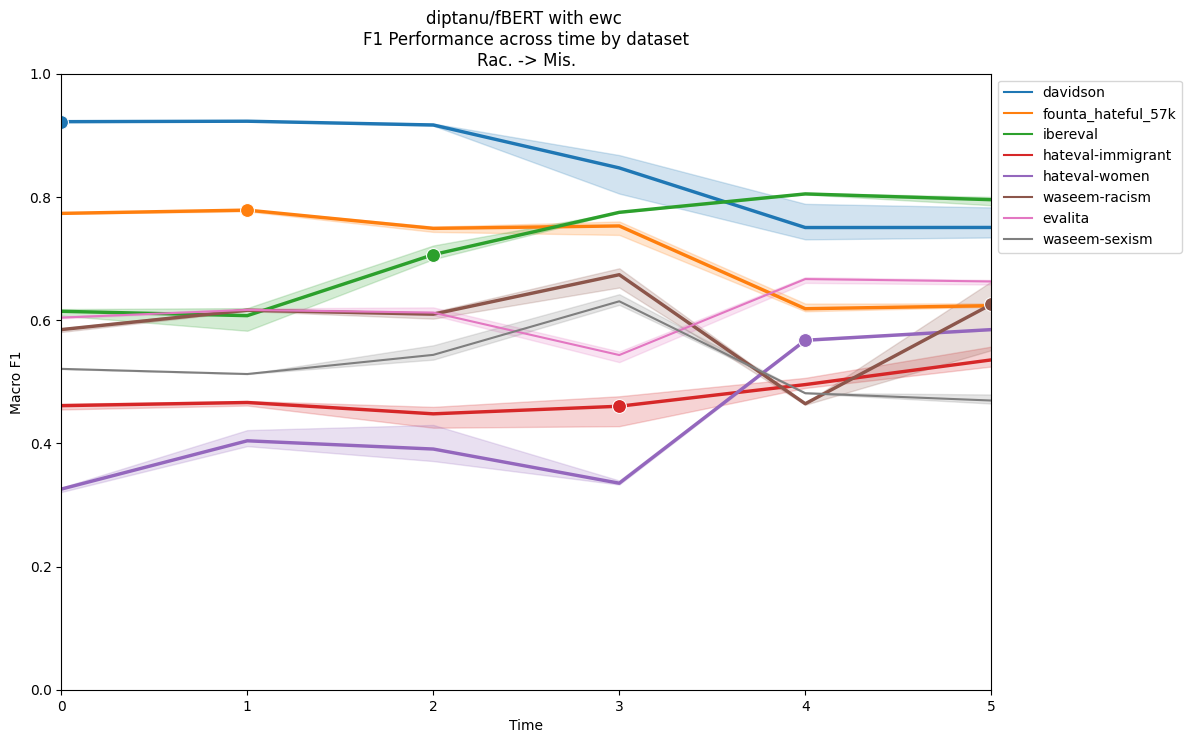

In [32]:
get_line_plot(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson)

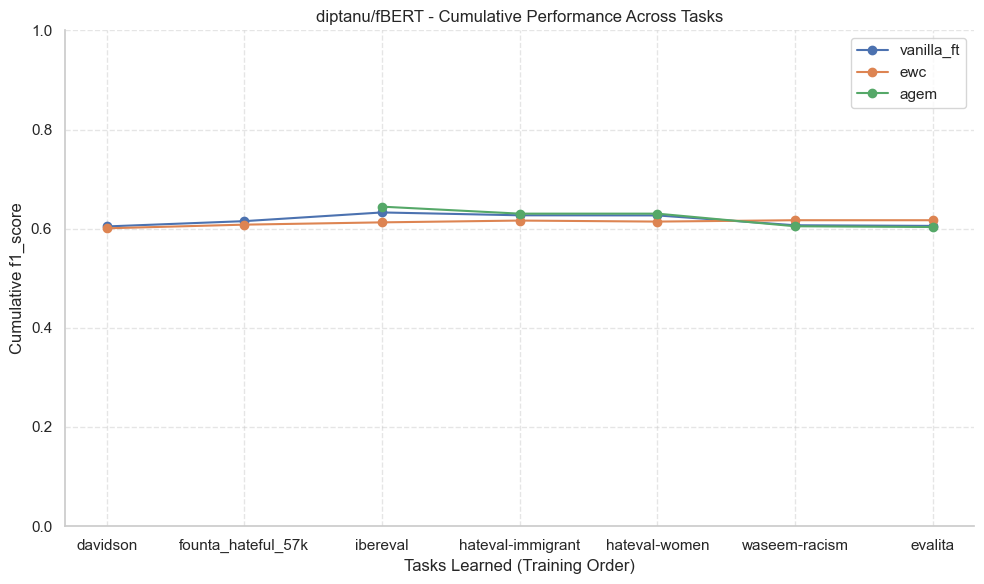

In [33]:
def plot_cumulative_learning_curves(model, df_experiment, metric="f1_score"):

    # Filter only for the model
    df_model = df_experiment[df_experiment["model"] == model].copy()

    # Get list of CL techniques and ordered training tasks
    cl_methods = df_model["cl_technique"].unique().tolist()
    training_order = df_model["dataset_currently_training"].unique().tolist()
    
    plt.figure(figsize=(10,6))
    sns.set_theme(style="whitegrid")

    for cl in cl_methods:
        df_cl = df_model[df_model["cl_technique"] == cl]
        
        # Compute cumulative performance per task (mean over testing datasets)
        cumulative_perf = []
        for i, task in enumerate(training_order):
            # All rows where dataset_currently_training is up to current task
            df_subset = df_cl[df_cl["dataset_currently_training"].isin(training_order[:i+1])]
            if not df_subset.empty:
                # Average metric over testing datasets
                mean_val = df_subset[metric].mean()
            else:
                mean_val = np.nan
            cumulative_perf.append(mean_val)
        
        # Optional: compute std over repeated experiments if multiple entries exist
        std_vals = []
        for i, task in enumerate(training_order):
            df_subset = df_cl[df_cl["dataset_currently_training"].isin(training_order[:i+1])]
            if not df_subset.empty:
                std_val = df_subset[metric].std()
            else:
                std_val = 0
            std_vals.append(std_val)
        
        cumulative_perf = np.array(cumulative_perf)
        # std_vals = np.array(std_vals)
        
        plt.plot(training_order, cumulative_perf, marker='o', label=cl)
        # plt.fill_between(range(len(training_order)), cumulative_perf-std_vals, cumulative_perf+std_vals, alpha=0.2)

    plt.xlabel("Tasks Learned (Training Order)")
    plt.ylabel(f"Cumulative {metric}")
    plt.title(f"{model} - Cumulative Performance Across Tasks")
    plt.ylim(0,1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    sns.despine()
    plt.tight_layout()
    plt.show()

plot_cumulative_learning_curves(model="diptanu/fBERT", df_experiment=df, metric="f1_score")

In [34]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

C:\Users\alber\AppData\Local\Temp\ipykernel_14588\64836523.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["zero_shot"] = ~df_filter["dataset_currently_testing"].isin(training_order)


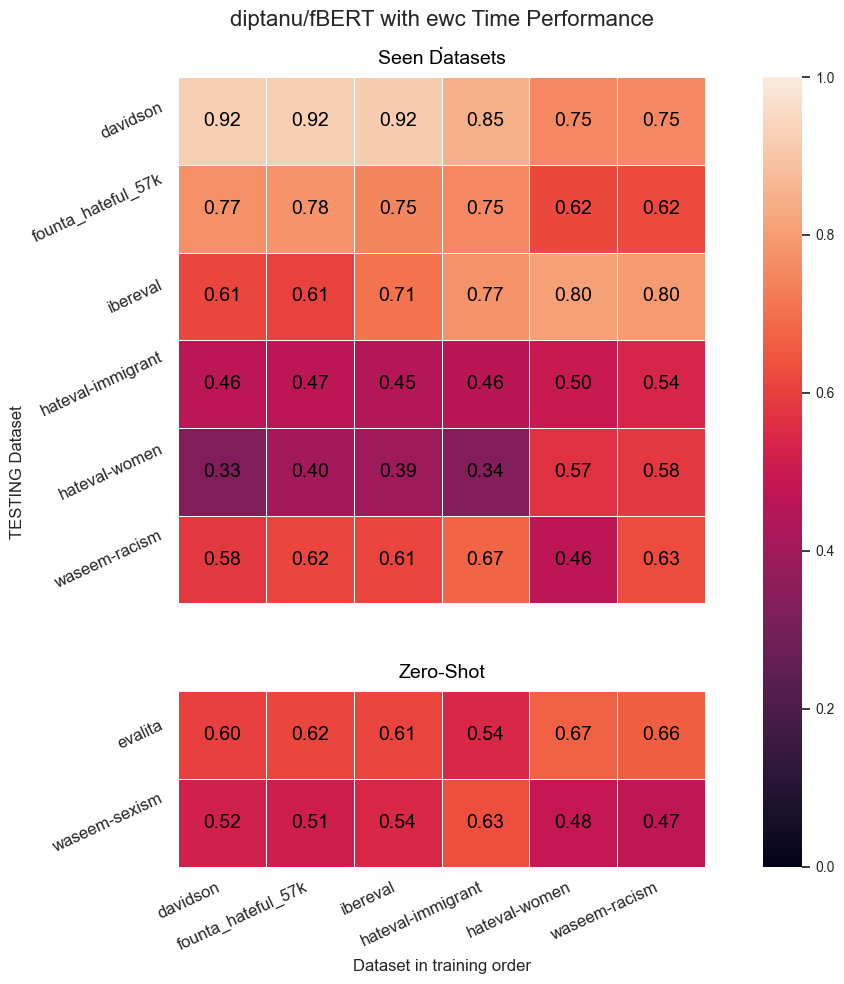

In [35]:

def get_heatmap(model, cl_technique, df_experiment, metric="f1_score"): 
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    df_filter = df_experiment[
        (df_experiment["model"] == model) & 
        (df_experiment["cl_technique"] == cl_technique)
    ]

    # Unique training datasets order
    training_order = df_filter["dataset_currently_training"].unique().tolist()

    # Identify zero-shot datasets
    df_filter["zero_shot"] = ~df_filter["dataset_currently_testing"].isin(training_order)

    df_seen = df_filter[~df_filter["zero_shot"]]
    df_zero = df_filter[df_filter["zero_shot"]]

    # Pivot data
    heat_seen = df_seen.pivot_table(
        values=metric, 
        index="dataset_currently_testing", 
        columns="dataset_currently_training"
    )
    heat_zero = df_zero.pivot_table(
        values=metric, 
        index="dataset_currently_testing", 
        columns="dataset_currently_training"
    )

    # Align columns and rows
    all_cols = training_order
    heat_seen = heat_seen.reindex(columns=all_cols)
    heat_seen = heat_seen.reindex(index=all_cols)
    heat_zero = heat_zero.reindex(columns=all_cols)

    # Add a NaN row between seen and zero-shot for visual separation
    gap_row = pd.DataFrame(np.nan, index=[""], columns=all_cols)
    heat_combined = pd.concat([heat_seen, gap_row, heat_zero])

    title = f"{model} with {cl_technique} Time Performance\n."

    sns.set_theme(style="whitegrid") 
    sns.color_palette("YlOrBr", as_cmap=True)
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        heat_combined,
        # cmap=cmap,
        linewidths=0.6,
        linecolor='white',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True,
        annot_kws={"size": 14, "color": "black"},
        vmin=0,
        vmax=1
    )

    # Formatting
    plt.xlabel("Dataset in training order")
    plt.ylabel("TESTING Dataset")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=25, ha='right', fontsize=12)

    # Make the NaN row white (gap)
    for i, label in enumerate(heat_combined.index):
        if label == "":
            ax.add_patch(plt.Rectangle((0, i), len(all_cols), 1, fill=True, color="white", lw=0))

    # Add mini titles close to their respective heatmaps
    if len(heat_seen) > 0:
        first_seen_idx = 0
        ax.text(len(all_cols)/2, first_seen_idx - 0.1, "Seen Datasets",
                ha='center', va='bottom', fontsize=14, color='black')

    if len(heat_zero) > 0:
        first_zero_shot_idx = heat_seen.shape[0] + 1  # first row after gap
        ax.text(len(all_cols)/2, first_zero_shot_idx - 0.1, "Zero-Shot",
                ha='center', va='bottom', fontsize=14, color='black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
get_heatmap(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson, metric="f1_score")

In [36]:
df["cl_technique"].unique()

array(['vanilla_ft', 'agem', 'ewc', 'mas'], dtype=object)

In [37]:

def pivot_and_delta(df, training_order, metric):
    if df.empty:
        return pd.DataFrame(columns=training_order)
    heat = df.pivot_table(values=metric, index="dataset_currently_testing", columns="dataset_currently_training")
    heat = heat[training_order]  # align columns
    heat_delta = heat.copy()
    # First column: force 0
    heat_delta.iloc[:, 0] = 0
    # Remaining columns: delta vs previous
    for i in range(1, heat.shape[1]):
        heat_delta.iloc[:, i] = heat.iloc[:, i] - heat.iloc[:, i-1]
    return heat_delta


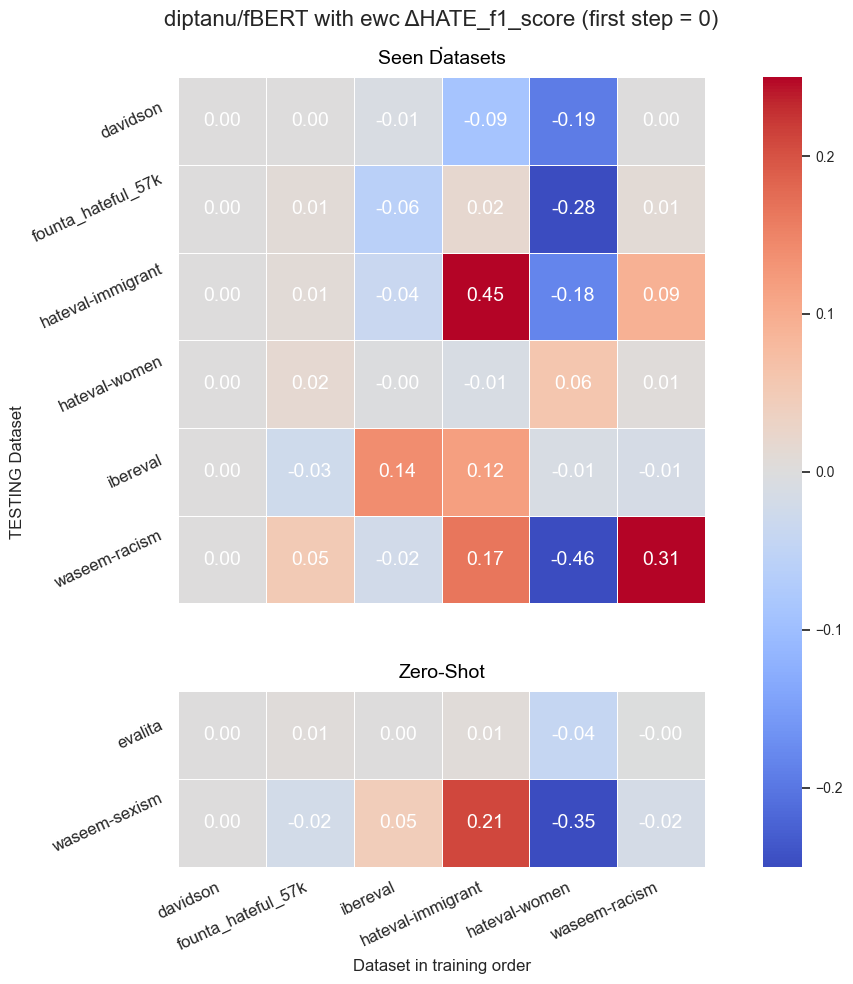

In [38]:

def get_heatmap_delta_vs_previous_zeroed_first(model, cl_technique, df_experiment, metric="f1_score"):

    df_filter = df_experiment[
        (df_experiment["model"] == model) & 
        (df_experiment["cl_technique"] == cl_technique)
    ].copy()

    # Unique training datasets order
    training_order = df_filter["dataset_currently_training"].unique().tolist()

    # Identify zero-shot datasets
    df_filter["zero_shot"] = ~df_filter["dataset_currently_testing"].isin(training_order)
    df_seen = df_filter[~df_filter["zero_shot"]]
    df_zero = df_filter[df_filter["zero_shot"]]

    # Pivot and compute deltas, first column explicitly 0

    heat_seen_delta = pivot_and_delta(df_seen, training_order, metric)
    heat_zero_delta = pivot_and_delta(df_zero, training_order, metric)

    # Add NaN gap row
    gap_row = pd.DataFrame(np.nan, index=[""], columns=training_order)
    heat_combined = pd.concat([heat_seen_delta, gap_row, heat_zero_delta])

    title = f"{model} with {cl_technique} Δ{metric} (first step = 0)\n."

    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        heat_combined,
        cmap="coolwarm",
        linewidths=0.6,
        linecolor='white',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True,
        annot_kws={"size": 14, "color": "white"},
        vmin=-0.25,
        vmax=0.25
    )

    # Formatting
    plt.xlabel("Dataset in training order")
    plt.ylabel("TESTING Dataset")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=25, ha='right', fontsize=12)

    # Make the NaN row white
    for i, label in enumerate(heat_combined.index):
        if label == "":
            ax.add_patch(plt.Rectangle((0, i), len(training_order), 1, fill=True, color="white", lw=0))

    # Mini titles
    if not heat_seen_delta.empty:
        ax.text(len(training_order)/2, 0 - 0.1, "Seen Datasets", ha='center', va='bottom', fontsize=14, color='black')
    if not heat_zero_delta.empty:
        first_zero_shot_idx = heat_seen_delta.shape[0] + 1
        ax.text(len(training_order)/2, first_zero_shot_idx - 0.1, "Zero-Shot", ha='center', va='bottom', fontsize=14, color='black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
get_heatmap_delta_vs_previous_zeroed_first(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson, metric="HATE_f1_score")

In [39]:

def get_heatmap_wrt_baseline(model, cl_technique, df_experiment, metric="f1_score", baseline="vanilla_ft"): 
    # Filter current model/technique and baseline
    df_filter = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == cl_technique)]
    df_filter_baseline = df_experiment[(df_experiment["model"] == model) & (df_experiment["cl_technique"] == baseline)]

    # Compute metric difference
    diff_values = df_filter[metric].values - df_filter_baseline[metric].values
    df_filter[metric] = diff_values

    # Unique training datasets order
    training_order = df_filter["dataset_currently_training"].unique().tolist()

    # Identify zero-shot datasets
    df_filter["zero_shot"] = ~df_filter["dataset_currently_testing"].isin(training_order)

    df_seen = df_filter[~df_filter["zero_shot"]]
    df_zero = df_filter[df_filter["zero_shot"]]

    # Pivot data
    heat_seen = df_seen.pivot_table(values=metric, index="dataset_currently_testing", columns="dataset_currently_training")
    heat_zero = df_zero.pivot_table(values=metric, index="dataset_currently_testing", columns="dataset_currently_training")

    # Align columns and rows
    all_cols = training_order
    heat_seen = heat_seen.reindex(columns=all_cols).reindex(index=all_cols)
    heat_zero = heat_zero.reindex(columns=all_cols)

    # Add a NaN row between seen and zero-shot for visual separation
    gap_row = pd.DataFrame(np.nan, index=[""], columns=all_cols)
    heat_combined = pd.concat([heat_seen, gap_row, heat_zero])

    title = f"{model} with {cl_technique} Performance wrt {baseline}\n."

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        heat_combined,
        cmap="coolwarm",
        linewidths=0.6,
        linecolor='white',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True,
        annot_kws={"size": 14, "color": "white"},
        vmin=-0.25,
        vmax=0.25
    )

    # Formatting
    plt.xlabel("Dataset in training order")
    plt.ylabel("TESTING Dataset")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=25, ha='right', fontsize=12)

    # Make the NaN row white (gap)
    for i, label in enumerate(heat_combined.index):
        if label == "":
            ax.add_patch(plt.Rectangle((0, i), len(all_cols), 1, fill=True, color="white", lw=0))

    # Add mini titles close to their respective heatmaps
    if len(heat_seen) > 0:
        ax.text(len(all_cols)/2, 0 - 0.1, "Seen Datasets", ha='center', va='bottom', fontsize=14, color='white')
    if len(heat_zero) > 0:
        first_zero_shot_idx = heat_seen.shape[0] + 1
        ax.text(len(all_cols)/2, first_zero_shot_idx - 0.1, "Zero-Shot", ha='center', va='bottom', fontsize=14, color='white')

    for spine in ax.spines.values():
        spine.set_visible(False)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)

    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
get_heatmap_wrt_baseline(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson, metric="HATE_f1_score", baseline="vanilla_ft")

ValueError: operands could not be broadcast together with shapes (144,) (48,) 

In [ ]:

def get_difference_last_performance(model, cl_technique, df_experiment, metric="f1_score", baseline="vanilla_ft"):
    
    max_time = df_experiment["time"].max()
    df_experiment = df_experiment[(df_experiment["cl_technique"] == cl_technique) | (df_experiment["cl_technique"] == baseline)]
    df_pivot = df_experiment[df_experiment["time"] == max_time].pivot_table(values=metric, index="dataset_currently_testing", columns="cl_technique")
    # print(df_pivot.columns)
    df_pivot['difference'] = df_pivot[cl_technique] - df_pivot[baseline]

    # Set style to plain white background
    plt.style.use('default')  # Reset to default style
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['grid.color'] = 'none'  # Remove grid lines

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        df_pivot.index,
        df_pivot['difference'],
        color=['skyblue' if x > 0 else 'salmon' for x in df_pivot['difference']],
        edgecolor='black',  # Add black borders to bars
        linewidth=0.5
    )

    # Customize labels and title
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('Difference in {metric} Score {cl_technique} - {baseline})', fontsize=12)
    plt.title(' \ Performance Difference Between {cl_technique} and {baseline} at the end of training', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height > 0 else 'top'
        y_pos = height + 0.005 if height > 0 else height - 0.005  # Offset for clarity
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            y_pos,
            f'{height:.3f}',
            ha='center',
            va=va,
            fontsize=9
        )

    # Add a zero reference line
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    # Remove spines (top and right borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylim(-1, 1)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()
    
get_difference_last_performance(model="diptanu/fBERT", cl_technique="ewc", df_experiment=df_davidson, metric="f1_score", baseline="vanilla_ft")

<>:28: SyntaxWarning: invalid escape sequence '\ '
<>:28: SyntaxWarning: invalid escape sequence '\ '
C:\Users\alber\AppData\Local\Temp\ipykernel_9304\3745220482.py:28: SyntaxWarning: invalid escape sequence '\ '
  plt.title(' \ Performance Difference Between {cl_technique} and {baseline} at the end of training', fontsize=14, pad=20)
C:\Users\alber\AppData\Local\Temp\ipykernel_9304\3745220482.py:28: SyntaxWarning: invalid escape sequence '\ '
  plt.title(' \ Performance Difference Between {cl_technique} and {baseline} at the end of training', fontsize=14, pad=20)


KeyError: 'vanilla_ft'

In [ ]:
df.columns

Index(['model', 'type_experiment', 'n_trainable_params', 'cl_technique',
       'hyperparams', 'experiment_name', 'time', 'dataset_currently_testing',
       'dataset_currently_training', 'dataset_wrt_training_datasets',
       'target_epochs', 'best_epochs', 'learning_rate', 'batch_size',
       'current_num_samples_training', 'cumulative_samples_trained',
       'f1_score', 'precision_score', 'recall_score', 'accuracy',
       'HATE_f1_score', 'HATE_precision_score', 'HATE_recall_score',
       'NoHATE_f1_score', 'NoHATE_precision_score', 'NoHATE_recall_score'],
      dtype='object')

C:\Users\alber\AppData\Local\Temp\ipykernel_9304\2343571915.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


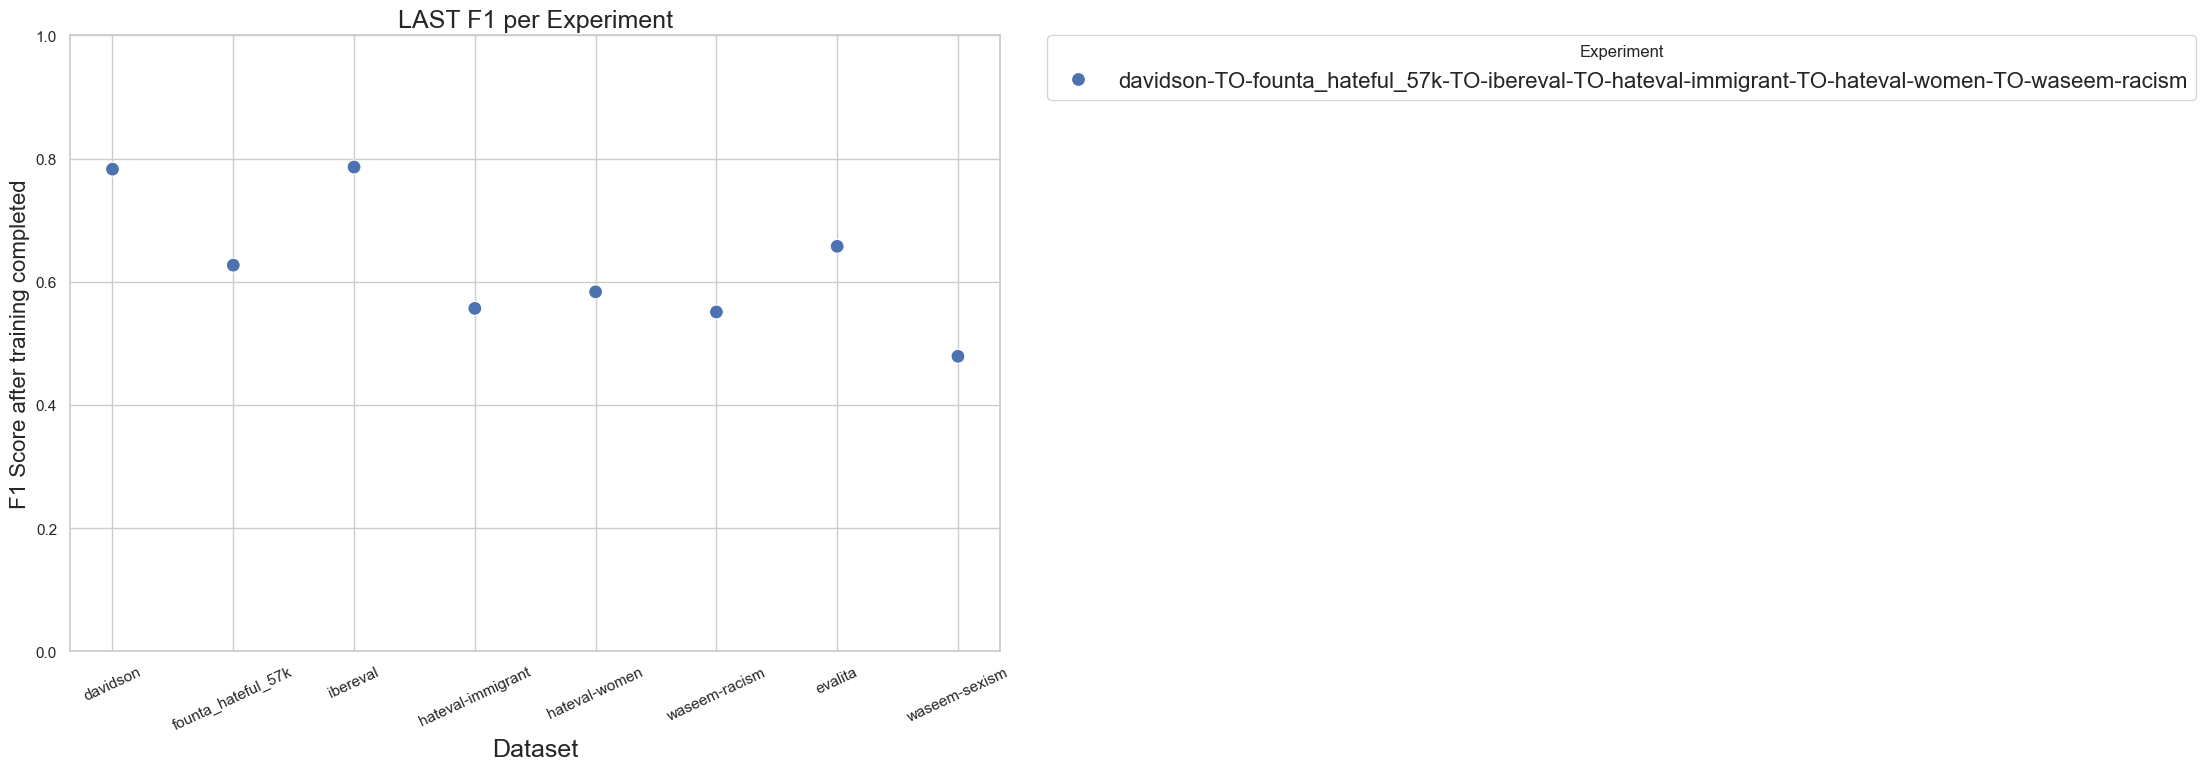

In [ ]:
def get_scatter_final_perf_by_exp(df, cl_technique, model, metric="f1_score"):
    
    df = df[(df["cl_technique"] == cl_technique) & (df["model"] == model)]
    list_dfs = []
    experiments = df["experiment_name"].unique()
    for exp in experiments:
        exp_df = df[df["experiment_name"] == exp]
        max_time = exp_df["time"].max()
        last_performance_df = exp_df[exp_df["time"] == max_time]
        list_dfs.append(last_performance_df)
    merged_df = pd.concat(list_dfs)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=merged_df,
        x="dataset_currently_testing",
        y=metric,
        hue='experiment_name',
        style='experiment_name',
        s=100
    )

    plt.xticks(rotation=25)
    plt.ylim(0, 1)
    plt.ylabel("F1 Score after training completed", fontsize=16)
    plt.xlabel("Dataset", fontsize=18)
    plt.title("LAST F1 per Experiment", fontsize=18)
    plt.legend(title="Experiment",     bbox_to_anchor=(1.05, 1),  # (x, y) position of the legend
                                        loc='upper left',          # anchor point of the legend
                                        borderaxespad=0.,          # padding between legend and plot
                                        fontsize=16)
    plt.tight_layout()
    plt.show()

get_scatter_final_perf_by_exp(df=df, cl_technique="ewc", model="diptanu/fBERT", metric="f1_score")

In [ ]:
def plot_forward_backward_transfer(model, df_experiment=df, metric="f1_score"):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    df_model = df_experiment[df_experiment["model"] == model].copy()
    cl_methods = df_model["cl_technique"].unique().tolist()
    training_order = df_model["dataset_currently_training"].unique().tolist()
    testing_order = df_model["dataset_currently_testing"].unique().tolist()

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12,5))

    # Forward Transfer
    plt.subplot(1,2,1)
    for cl in cl_methods:
        df_cl = df_model[df_model["cl_technique"] == cl]
        fwt = []
        for i, train_task in enumerate(training_order[:-1]):  # forward to future tasks
            future_tasks = training_order[i+1:]
            vals = []
            for ft in future_tasks:
                subset = df_cl[
                    (df_cl["dataset_currently_training"] == train_task) &
                    (df_cl["dataset_currently_testing"] == ft)
                ]
                if not subset.empty:
                    vals.append(subset[metric].values[0])
            fwt.append(np.mean(vals) if vals else 0)
        plt.plot(training_order[:-1], fwt, marker='o', label=cl)
    plt.xlabel("Training Task")
    plt.ylabel(f"Forward Transfer ({metric})")
    plt.title("Forward Transfer")
    plt.legend()
    plt.ylim(0,1)

    # Backward Transfer
    plt.subplot(1,2,2)
    for cl in cl_methods:
        df_cl = df_model[df_model["cl_technique"] == cl]
        bwt = []
        for i, train_task in enumerate(training_order[1:], start=1):
            past_tasks = training_order[:i]  # tasks already learned
            vals = []
            for pt in past_tasks:
                subset = df_cl[
                    (df_cl["dataset_currently_training"] == train_task) &
                    (df_cl["dataset_currently_testing"] == pt)
                ]
                if not subset.empty:
                    vals.append(subset[metric].values[0])
            # backward transfer = delta vs previous performance (forgetting)
            bwt.append(np.mean(vals) if vals else 0)
        plt.plot(training_order[1:], bwt, marker='o', label=cl)
    plt.xlabel("Training Task")
    plt.ylabel(f"Backward Transfer ({metric})")
    plt.title("Backward Transfer")
    plt.ylim(0,1)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_forward_backward_transfer( model="diptanu/fBERT")